# Integrated CA for Machine Learning and Data Visualization Techniques

## Student Name: Mijail Fausto Blanco Vargas
## Student Number: 2023012
## Git Hub Link:  https://github.com/mijailbv/Integrated_CA_ML_-DVis

## Assessment details
### 1) Discuss and explain the purpose of a recommendation system for online retail business in machine learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models for the user-user or item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.


## 1.1) Discussion and Explanation of a Recommendation system in Machine Learning:

A recomendation system in online retail has the purpose to suggest customers or users what services or products they would be interested to purchase, adquire, or buy according to previous data like previous sells, categories of the products, streaming services, demographics, age, among others are analyzed creating the recommendation system using Machine Learning Models that predicts what are the interests of the customers and give us the option to offer it to them. For example, when you buy clothes in Shein, after you buy them, you got new recommendation clothers according to what you bought previously and what are the tendencies that other people bought when they selected the same product you choose and this new recommendations come because Machine Learning is implemented in many companies to save time to customers and also give offers that the customer could be interested.

## 1.2 Comparisson between Content and Collaborative Filtering using Books Dataset

For the delopment of this CA I choose a books dataset that is divided in 3 different excels since it gives different information about the books and the users. Accoding to each question the variables will be selected for the analysis.

Before comparing them, let's get familiar with the data exploring inside it and cleaning the data to perform the analysis

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from IPython.display import Image
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading dataset
df_book = pd.read_csv('Books.csv')
df_rating = pd.read_csv('Ratings.csv')
df_users = pd.read_csv('Users.csv')

In [4]:
#Looking at the first 5 rows of df_book
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#Looking at the first 5 rows of df_rating
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
#Looking at the first 5 rows of df_users
df_users = df_users.rename(columns=lambda x: x.replace('-','_'))
df_users.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
print('The shape of df_books is', df_book.shape)
print('The shape of df_rating is', df_rating.shape)
print('The shape of df_users is', df_users.shape)

The shape of df_books is (271360, 8)
The shape of df_rating is (1149780, 3)
The shape of df_users is (278858, 3)


After looking the different excel files from the same dataset, we can see that they are related to each other since we can see that df_ratis contains ISBN that is a code repeated in the books datafram with which we can calculate the ratings of the books according to the users. Besides in df_users we can see the location of each user and the age. Due to the different size of each excel file, we can not concatenate; however all the information from each is usefull for the analysis, I will be creating dataframes with the relevant columns for each analysis.

### Data Dictionary

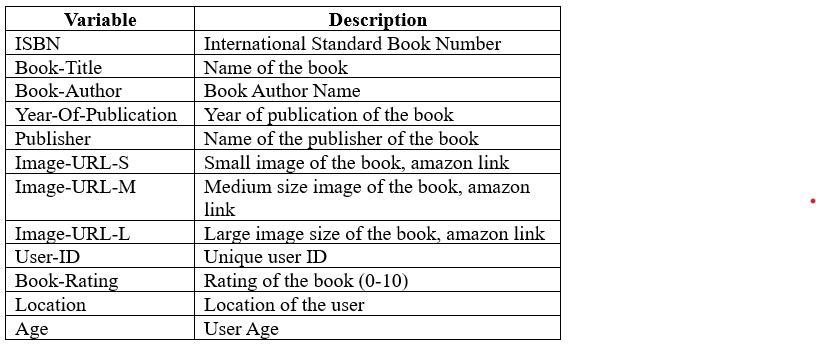

In [8]:
#Importing Data Dictionary
Image(filename =r'Data_Dictionary.jpg')

### Characterization of the dataset

In [9]:
#Exploring data types and counting null values
df_book.info()
df_rating.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

We can see a mixture of numerical discrete, continuous values and objects. However, according to the data dictionary the column "Year-Of-Publication" is a numerical value and it is shown as an object. This will be analyzed indeed.

### Data Cleaning

First, let's explore why the column "Year of Publication" is detected as an object instead of an integer

In [10]:
df_book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that instead of a year we have 'DK Publishing Inc', and 'Gallimard' in the columsn and that is the reason it is detected as object

In [11]:
#Analyzing "Year-Of-Publication" columns
df_book[df_book['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [12]:
#Analyzing "Year-Of-Publication" columns
df_book[df_book['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


After looking carefully this 3 colums doesn't have the book author name and since they are represented by object instead of numeric value I am going to drop those columns and convert the column into a numeric value

In [13]:
#Dropping columns with missing information and transforming the column into numeric
df_book = df_book[df_book['Year-Of-Publication'] !='DK Publishing Inc']
df_book = df_book[df_book['Year-Of-Publication'] !='Gallimard']
df_book['Year-Of-Publication'] = pd.to_numeric(df_book['Year-Of-Publication'], errors='coerce')

In [14]:
# Printing the new shaoe after dropping columns
print('The shape of df_books is', df_book.shape)
print('The shape of df_rating is', df_rating.shape)
print('The shape of df_users is', df_users.shape)

The shape of df_books is (271357, 8)
The shape of df_rating is (1149780, 3)
The shape of df_users is (278858, 3)


In [15]:
# Dropping duplicates
df_book.drop_duplicates()
df_rating.drop_duplicates()
df_users.drop_duplicates()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [16]:
print('The shape of df_books is', df_book.shape)
print('The shape of df_rating is', df_rating.shape)
print('The shape of df_users is', df_users.shape)

The shape of df_books is (271357, 8)
The shape of df_rating is (1149780, 3)
The shape of df_users is (278858, 3)


The shape of the data didn't change after dropping duplicates in all the dataset which means we don't have duplicate values.

In [17]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--", " "]
df_book = df_book.replace(missing_val, pd.NA)
df_rating = df_rating.replace(missing_val, pd.NA)
df_users = df_users.replace(missing_val, pd.NA)

In [18]:
#Showing the percentage of NaN values in each column
NaN_book = (df_book.isnull().sum()/len(df_book))*100
NaN_rating = (df_rating.isnull().sum()/len(df_rating))*100
NaN_users = (df_users.isnull().sum()/len(df_users))*100
# NaN values in book dataframe
NaN_book

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000737
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000000
dtype: float64

In [19]:
# NaN values in rating dataframe
NaN_rating

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [20]:
# NaN values in users dataframe
NaN_users

User_ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

the column "Book-Author" and "Publisher" has less than 1% null values and they are going to be replaced by "Unknown", and the column "Age" has more than 39% of Nan Values in which if we replace them, we could introduce variance into our data and because of that I am going to drop the complete column. 

NOTE: In the next line of code I copied in another dataframe df_users for future uses in Data Visualizations dashboard.

In [21]:
# cretion of dataframe users senior for dashboard in Data visualization part
df_users_senior = df_users.copy()

In [22]:
# Dropping "Age" column
df_users.drop('Age', axis=1, inplace=True)

In [23]:
# Replacing null values for "Unknown"
df_book['Book-Author'].fillna('Unknown', inplace= True)
df_book['Publisher'].fillna('Unknown', inplace= True)

## Content Based Recommended System

In content Based recommended Systems we give suggestions to the customers according to the characteristics of the items in this case we have publisher, year of publication, rating and Book-Author as variables that can help us suggest the customers new books to choose.

### a) Simple Recommender System

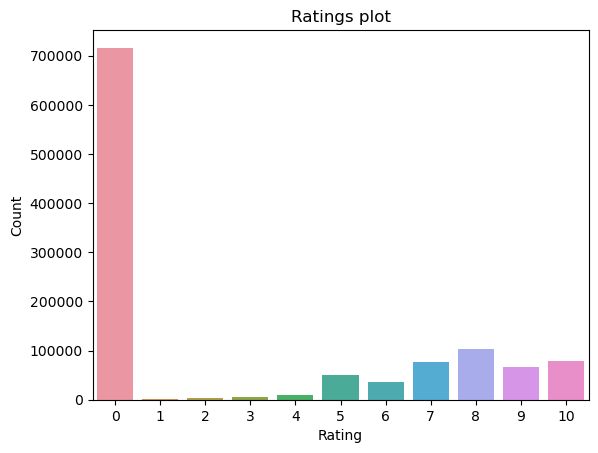

In [24]:
sns.countplot(x='Book-Rating', data = df_rating)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings plot')
plt.show()

We have many ratings as zero values that could cause problems with this model. Since this model considers a lot the ratings of the books and gives a recommendation accoring to the number of people that rated the books and the ratings, I will just consider the books that were rated for this analysis

Besides, in the simple recommender system, we need a dataframe in which we can see the vote counts and the vote average of the books. So I will create a data frame with the desired columns and the columns needed for this analysis

In [25]:
ratings_no_zeros = df_rating[df_rating['Book-Rating']>0]
average_rating = ratings_no_zeros.groupby('ISBN')['Book-Rating'].agg(['mean', 'count']).reset_index()
average_rating['mean'] = average_rating['mean'].round(1)
average_rating

,ISBN,mean,count
0,0330299891,6.0,1
1,0375404120,3.0,1
2,9022906116,7.0,1
3,#6612432,5.0,1
4,'9607092910',10.0,1
...,...,...,...
185968,"\8888809228\""""",5.0,1
185969,"\9170010242\""""",10.0,1
185970,ooo7156103,7.0,1
185971,´3499128624,8.0,1


In [26]:
Simple_BRS = pd.merge(df_book, average_rating, on='ISBN')
Simple_BRS.rename(columns={'mean':'Average-Rating', 'count':'Rating-Count'}, inplace = True)
Simple_BRS = Simple_BRS.rename(columns=lambda x: x.replace('-','_'))
Simple_BRS

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Average_Rating,Rating_Count
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,7.7,9
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,7.5,2
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,7.8,6
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8.2,17
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,8.0,1
...,...,...,...,...,...,...,...,...,...,...
149830,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,http://images.amazon.com/images/P/0395264707.0...,10.0,1
149831,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,7.0,1
149832,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,5.0,1
149833,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,7.0,1


In [27]:
NaN_Simple_BRS = (Simple_BRS.isnull().sum()/len(Simple_BRS))*100
NaN_Simple_BRS

ISBN                   0.0
Book_Title             0.0
Book_Author            0.0
Year_Of_Publication    0.0
Publisher              0.0
Image_URL_S            0.0
Image_URL_M            0.0
Image_URL_L            0.0
Average_Rating         0.0
Rating_Count           0.0
dtype: float64

I am going to calculate the weighted Rating and define the variables to calculate it

In [28]:
# Calculate mean of rating across the dataframe
C = Simple_BRS['Average_Rating'].mean()
print(C)

7.52757766876898


The average rating (C) is 7.53 on a scale of 10
and now let's see the number of books that had scores in the 99th percentile since according to the graphic is where we start having more interactivity in the ratings in I selected a high quantile since I want results in books that had large number of ratings to have more trustable results

<function matplotlib.pyplot.show(close=None, block=None)>

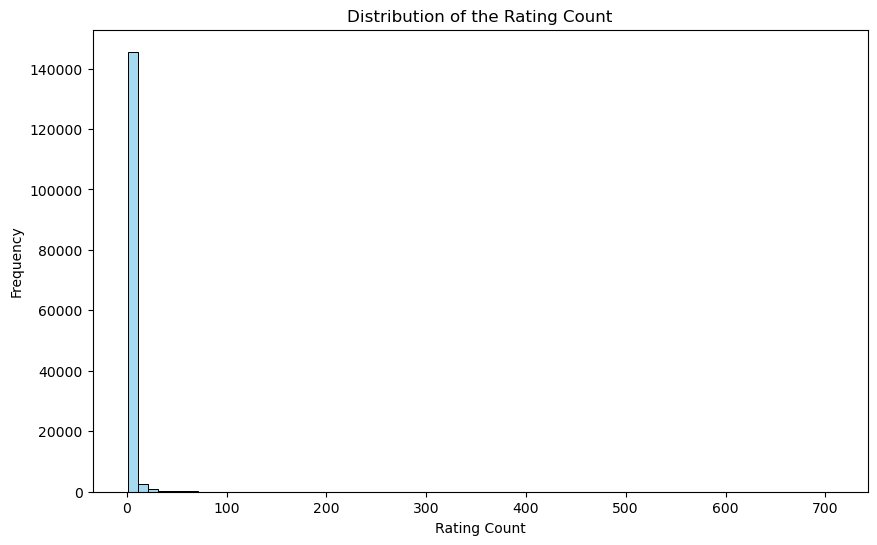

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(Simple_BRS['Rating_Count'], bins=70,kde=False, color='skyblue')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.title('Distribution of the Rating Count')
plt.show

In [30]:
# Calculate the minimum number of ratings (m)
m = Simple_BRS['Rating_Count'].quantile(0.99)
print(m)

24.0


The value of m is small since few people rated many books and that is why the distribution gave us m as a small result. If the results of this model show "Rating-Count" as low values, m should be changed because we can not trust in final results with few people that rated the books, but if they are considered high, it is good to accept those values.

now, let's filter the movides selecting just the ones that are equal or greater than the minimum number of ratings (m)

In [31]:
# Filter the movies
q_books = Simple_BRS.copy().loc[Simple_BRS['Rating_Count'] >= m]
q_books.shape

(1586, 10)

In [32]:
# Implementing the function weighted_rating
def weighted_rating(x, m=m, C=C):
    v = x['Rating_Count']
    R = x['Average_Rating']
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [33]:
#Creating score vareiable based on the weighted_rating
q_books['score'] = q_books.apply(weighted_rating, axis = 1)

In [34]:
# Sorting the best 15 books according to the score weighted_rating
q_books = q_books.sort_values('score', ascending = False)
q_books[['Book_Title', 'Book_Author', 'Rating_Count', 'Average_Rating', 'score']].head(15)

,Book_Title,Book_Author,Rating_Count,Average_Rating,score
4718,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,137,9.3,9.035788
3646,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,77,9.4,8.955068
5487,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,133,9.1,8.859630
4785,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,206,9.0,8.846356
1868,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,313,8.9,8.802261
3339,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,141,9.0,8.785829
30,To Kill a Mockingbird,Harper Lee,214,8.9,8.761604
2467,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,119,9.0,8.752880
682,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,83,9.1,8.747307
5980,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,110,9.0,8.736283


In [106]:
q_books

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Average_Rating,Rating_Count,score
4718,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,9.3,137,9.035788
3646,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,9.4,77,8.955068
5487,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,9.1,133,8.859630
4785,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,9.0,206,8.846356
1868,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,8.9,313,8.802261
...,...,...,...,...,...,...,...,...,...,...,...
23677,044661095X,Killing Time,Caleb Carr,2002,Warner Books,http://images.amazon.com/images/P/044661095X.0...,http://images.amazon.com/images/P/044661095X.0...,http://images.amazon.com/images/P/044661095X.0...,5.5,26,6.473237
3256,0451203895,4 Blondes,Candace Bushnell,2002,Signet Book,http://images.amazon.com/images/P/0451203895.0...,http://images.amazon.com/images/P/0451203895.0...,http://images.amazon.com/images/P/0451203895.0...,5.7,52,6.277130
510,080213825X,Four Blondes,Candace Bushnell,2001,Grove Press,http://images.amazon.com/images/P/080213825X.0...,http://images.amazon.com/images/P/080213825X.0...,http://images.amazon.com/images/P/080213825X.0...,5.4,54,6.054639
39,0425182908,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,5.3,71,5.862756


The score calculated with wighted_rating function is the one in which we can trust because it considers how many users voted in the movie, the minimum requires, the average rating and the mean across the whole data which gives us a result in which we can trust. In the rating count we can see that many people rated those books which confirms as well that we can trus in m value calculated before. 

### b) Content Based Recommender analyzing Book-Author, Year-Of-Publication and Publisher

For this analysis, we are going to focus in the text analysis instead of ratings and we will focus on Book-Title, Book-Author, Year-Of Publication and Publisher, all this rows were in df_books, I am going to create a new dataframe with the information required for this anaysis 

In [35]:
df_ContentBR = df_book[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
df_ContentBR = df_ContentBR.rename(columns=lambda x: x.replace('-','_'))
df_ContentBR

,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...
271355,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,Republic (World's Classics),Plato,1996,Oxford University Press


In [36]:
#Converting all words to lower case and dealing with spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Check if feature exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [37]:
# Applying clean_data function in the columns
sel_features = ['Book_Author', 'Year_Of_Publication', 'Publisher']
for feature in sel_features:
    df_ContentBR[feature] = df_ContentBR[feature].apply(clean_data)

In [38]:
# Creating a soup with the words to vectorize them and adding as a column to the dataframe
df_ContentBR['mixed_soup'] = df_ContentBR['Book_Author'] + ' ' + df_ContentBR['Year_Of_Publication'].astype(str) + ' ' + df_ContentBR['Publisher']
df_ContentBR[['mixed_soup']].head(4)

,mixed_soup
0,markp.o.morford oxforduniversitypress
1,richardbrucewright harperflamingocanada
2,carlod'este harperperennial
3,ginabarikolata farrarstrausgiroux


In this part I decided to analize with different features to have more precision in the modelling since with more information of the books I can predict better the similarities to recommend other books and now I am going to use Count Vectorizer.

In [39]:
# Applying Count vectorizer and creating a matrix
CV = CountVectorizer(stop_words='english')
CV_mat = CV.fit_transform(df_ContentBR['mixed_soup'])
CV_mat.shape

(271357, 112629)

In [40]:
# Applying cosine_similarity
cosine_sim = cosine_similarity(CV_mat[:10000], CV_mat[:10000])

In [41]:
# Reset index of your main DataFrame and construct reverse mapping as before
df_ContentBR = df_ContentBR.reset_index()
indices = pd.Series(df_ContentBR.index, index=df_ContentBR['Book_Title'])

Since our matrix is big, we are going to apply the model just to the first 12000 rows of the matrix

In [42]:
# Applying  function get_recommendations of the 10 most similar movies
def get_recommendations(Book_Title, cosine_sim=cosine_sim):
    idx = indices[Book_Title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return df_ContentBR['Book_Title'].iloc[book_indices]

In [43]:
get_recommendations('PLEADING GUILTY')

1339            Divining Women (Ay Spoken Word - Gibbons)
1963                           Reversible Errors: A Novel
2680    STAR TREK YESTERDAY'S SON (Star Trek: The Orig...
3122                             The STAR TREK THE RETURN
3725                                    Presumed Innocent
3737                                      Pleading Guilty
6229                                    Personal Injuries
7150                                    Reversible Errors
7396    SCARLETTTHE SEQUEL TO MARAGARET MITCHELL'S GON...
9615                                  The Burden of Proof
Name: Book_Title, dtype: object

### Colaborative Filtering

In collaborative filtering we suggest or give advise to the customer according to preferences or similar items that other users have adquired and in this case as we are talking about books it would be recommend a book according to other books or other users with similar characteristics.

I have a big data from users that rated movies, and that could cause error in our next functions due to the shape of the data. So I will filter and just use the movies that were rated for 50 users or more and ratings marked as zeros will not be considered since they represent users that read the book but didn't give a rating

In [44]:
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [45]:
filters = df_rating['ISBN'].value_counts()[df_rating['ISBN'].value_counts()>50].index
Colab_F = df_rating[df_rating['ISBN'].isin(filters)]
Colab_F = Colab_F.rename(columns=lambda x: x.replace('-','_'))
Colab_F = Colab_F[Colab_F['Book_Rating'] !=0]
Colab_F = Colab_F.reset_index(drop=True)
Colab_F

,User_ID,ISBN,Book_Rating
0,276744,038550120X,7
1,276747,0060517794,9
2,276747,0671537458,9
3,276754,0684867621,8
4,276755,0451166892,5
...,...,...,...
93871,276688,0553572512,7
93872,276688,0553575090,7
93873,276688,0553575104,6
93874,276704,0345386108,6


In [46]:
#Defining variables
X = Colab_F.copy()
y = Colab_F['User_ID']
print(X,y)

       User_ID        ISBN  Book_Rating
0       276744  038550120X            7
1       276747  0060517794            9
2       276747  0671537458            9
3       276754  0684867621            8
4       276755  0451166892            5
...        ...         ...          ...
93871   276688  0553572512            7
93872   276688  0553575090            7
93873   276688  0553575104            6
93874   276704  0345386108            6
93875   276704  0743211383            7

[93876 rows x 3 columns] 0        276744
1        276747
2        276747
3        276754
4        276755
          ...  
93871    276688
93872    276688
93873    276688
93874    276704
93875    276704
Name: User_ID, Length: 93876, dtype: int64


In [47]:
y.value_counts()

User_ID
11676     995
16795     234
104636    201
95359     195
153662    148
         ... 
112946      1
112935      1
112915      1
112912      1
135855      1
Name: count, Length: 30780, dtype: int64

Before splitting we need to make balance the classes in the dataset since when we count th y values we need to have at least 2 to make correctly the stratification and that is why I am going to filter the values

In [48]:
y = y.groupby(y).filter(lambda x: len(x) > 1)
X = X[X['User_ID'].isin(y)]

In [49]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size = 0.2, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75054, 3), (75054,), (60043, 3), (15011, 3), (60043,), (15011,))

In [50]:
y.value_counts()

User_ID
11676     995
16795     234
104636    201
95359     195
153662    148
         ... 
132687      2
132616      2
132582      2
132425      2
276704      2
Name: count, Length: 11958, dtype: int64

In [51]:
# Applying Mean Squared Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [52]:
#Defining baseline 5
def baseline(User_ID, ISBN):
    return 5.0

In [53]:
# Function to calculate Root Mean Squared Error
def score(cf_model):
    id_pairs = zip(X_test['User_ID'], X_test['ISBN'])
    y_pred = np.array([cf_model(User_ID, ISBN) for (User_ID, ISBN) in id_pairs])
    y_true = np.array(X_test['Book_Rating'])
    return rmse(y_true, y_pred)

In [54]:
score(baseline)

3.3110361664645906

That is the score baseline that will help us determine if the next models are performing better. 

I will apply User Based Collaborative Filtering for this analysis.

In [55]:
# Creting a rating matrix
matrix = X_train.pivot(values = 'Book_Rating', index = 'User_ID', columns = 'ISBN')
matrix.head()

ISBN,000649840X,002026478X,0020442203,002542730X,0028604199,006000438X,0060008032,0060008776,006001203X,0060085444,...,1931561648,3257228007,3257229534,3404148665,3423202327,3426029553,3442437407,3442541751,3492045170,8873122933
User_ID,,,,,,,,,,,,,,,,,,,,,
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Mean Rating Filtering
def cf_user_mean(User_ID, ISBN):
    if ISBN in matrix:
        mean_rating = matrix[ISBN].mean()
    else:
        mean_rating = 5.0
    return mean_rating

In [57]:
#Compute RMSE for the Mean model
score(cf_user_mean)

1.73515138499277

In [58]:
#Applying Weighted Mean with dummie variables
dummy_matrix = matrix.copy().fillna(0)
dummy_matrix.head()

ISBN,000649840X,002026478X,0020442203,002542730X,0028604199,006000438X,0060008032,0060008776,006001203X,0060085444,...,1931561648,3257228007,3257229534,3404148665,3423202327,3426029553,3442437407,3442541751,3492045170,8873122933
User_ID,,,,,,,,,,,,,,,,,,,,,
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Calculating cosine similarity into the matrix
cosine_sim = cosine_similarity(dummy_matrix, dummy_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
cosine_sim = pd.DataFrame(cosine_sim, index=matrix.index, columns=matrix.index)
cosine_sim.head(10)

User_ID,26,99,114,165,243,244,254,256,388,424,...,278582,278586,278633,278663,278773,278798,278832,278843,278844,278854
User_ID,,,,,,,,,,,,,,,,,,,,,
26,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
99,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
114,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
165,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
243,0.0,0.0,0.0,0.0,1.000000,0.184803,0.000000,0.177429,0.0,0.000000,...,0.0,0.0,0.060463,0.0,0.0,0.0,0.134889,0.000000,0.0,0.0
244,0.0,0.0,0.0,0.0,0.184803,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.260133,0.000000,0.0,0.0
254,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.128398,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.101346,0.0,0.0
256,0.0,0.0,0.0,0.0,0.177429,0.000000,0.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
388,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [61]:
def cf_user_wmean(User_ID, ISBN):
    if ISBN in matrix.columns:
        sim_scores = cosine_sim[User_ID]
        m_ratings = matrix[ISBN]
        idx = m_ratings[m_ratings.isnull()].index
        m_ratings = m_ratings.dropna()
        sim_scores = sim_scores.drop(idx)
        
        # Replace NaN values with 0.0
        m_ratings = m_ratings.fillna(0.0)
        #we are calculating the score mean rating, the
        wmean_rating = np.dot(sim_scores, m_ratings) / (sim_scores.sum() + 1e-6)  # Adding a small epsilon to avoid division by zero
        
    else:
        wmean_rating = 5.0
    
    return wmean_rating

In [62]:
score(cf_user_wmean)

2.8679984594623487

According to the mean score the best model is the Mean Rating filtering model, and in second place comes the weighted mean model; both of them are better than the base line score gotten. Although Mean Rating Filtering shows a better result, I trust and decide to use in this case the weighted Mean Score since due to the use of cosine similarity we can compare between users according to the preferences of other readers and captures the reader behaviour. As the weighted model is lower than the baseline Root Squeared Error metric, this is the one I trust more.

### Add a little bit more of detail in the next question

Answering the previous question, until this part I presented a clear example of the diferences between content and collaborative filtering in which in content we analyzed what was inside the item for example the publisher, the author and the year and we recommend according to the information we have about the item that in this case is books and now I performed collaborative filtering that can be based on the user preferences like the ratings in the books and based on other ratings from other people that read the books I can recommend other books that people read training the recommendation based on other preferences that users like. Also, collaborative filtering can be used with item to item and generate recommedations with that

## Train and test machine learning models for item-item collaborative filtering

In [63]:
#Showing the first 5 rows of the dataframe dataframe
Colab_F =pd.merge(Colab_F[['User_ID', 'ISBN', 'Book_Rating']], df_book[['ISBN', 'Book-Title']], on ='ISBN', how='left')
Colab_F = Colab_F.rename(columns=lambda x: x.replace('-','_'))
Colab_F.head()

,User_ID,ISBN,Book_Rating,Book_Title
0,276744,038550120X,7,A Painted House
1,276747,0060517794,9,Little Altars Everywhere
2,276747,0671537458,9,Waiting to Exhale
3,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel
4,276755,0451166892,5,The Pillars of the Earth


In [64]:
Colab_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93876 entries, 0 to 93875
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      93876 non-null  int64 
 1   ISBN         93876 non-null  object
 2   Book_Rating  93876 non-null  int64 
 3   Book_Title   92696 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [65]:
# Transforming a matrix for rating
n_user = Colab_F['User_ID'].nunique()
n_books = Colab_F['ISBN'].nunique()
isbn_to_index = {isbn: idx for idx, isbn in enumerate(Colab_F['ISBN'].unique())}
user_to_index = {user_id: idx for idx, user_id in enumerate(Colab_F['User_ID'].unique())}
A = np.zeros((n_user, n_books))
for line in Colab_F.itertuples():
    user_idx = user_to_index[line[1]]
    isbn = line[2]
    book_idx = isbn_to_index[isbn]
    A[user_idx, book_idx] = line[3]
print("Original matrix for rating: ", A)

Original matrix for rating:  [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 9. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j]>=3:
            A[i][j]=1
        else:
            A[i][j]=0
csr_sample = csr_matrix(A)
print(csr_sample)

  (0, 0)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (5, 6)	1.0
  (6, 7)	1.0
  (7, 8)	1.0
  (7, 9)	1.0
  (8, 10)	1.0
  (9, 11)	1.0
  (10, 12)	1.0
  (11, 13)	1.0
  (12, 14)	1.0
  (13, 15)	1.0
  (14, 16)	1.0
  (14, 17)	1.0
  (15, 18)	1.0
  (16, 19)	1.0
  (17, 20)	1.0
  (18, 3)	1.0
  (18, 21)	1.0
  (18, 22)	1.0
  (18, 23)	1.0
  :	:
  (30775, 928)	1.0
  (30775, 998)	1.0
  (30775, 1116)	1.0
  (30775, 1163)	1.0
  (30775, 1176)	1.0
  (30775, 1201)	1.0
  (30775, 1246)	1.0
  (30775, 1407)	1.0
  (30775, 1671)	1.0
  (30775, 1736)	1.0
  (30775, 1876)	1.0
  (30775, 2027)	1.0
  (30776, 440)	1.0
  (30776, 450)	1.0
  (30776, 514)	1.0
  (30776, 592)	1.0
  (30776, 1019)	1.0
  (30777, 40)	1.0
  (30778, 404)	1.0
  (30778, 832)	1.0
  (30778, 1228)	1.0
  (30778, 1707)	1.0
  (30778, 2068)	1.0
  (30779, 258)	1.0
  (30779, 539)	1.0


train_size = 0.8
train, test = train_test_split(csr_sample, train_size= train_size, random_state=42)

test.shape

In [67]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
knn.fit(csr_sample)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

#Creating the function to predict
predictions = []
for i in range (test.shape[0]):
    _, indices= knn.kneighbors(test[i], n_neighbors=3)
    indices = indices.flatten()
    predicted_values = np.mean(train[indices], axis =0)
    predictions.append(predicted_values)
predictions = np.concatenate(predictions)
predictions = predictions[:len(true_values)]

predictions.shape

true_values = test.data
true_values.shape

true_values = test.data
flat_pred = predictions.flatten()
nonzer_pred = flat_pred[:len(true_values)].reshape(-1,1)
mse = mean_squared_error(true_values, nonzer_pred)
rmse = np.sqrt(mse)
print('RMSE is:', rmse)

In [68]:
dataset_sort_des = Colab_F.sort_values(['User_ID', 'ISBN'], ascending=[True, False])
filter1 = dataset_sort_des[dataset_sort_des['User_ID'] == 276747].ISBN
filter1 = filter1.tolist()
filter1 = filter1[:20]
liked_books_info = Colab_F[Colab_F['ISBN'].isin(filter1)][['ISBN','Book_Title']].drop_duplicates()
print("Books liked by user: ",liked_books_info)

Books liked by user:           ISBN                Book_Title
1  0060517794  Little Altars Everywhere
2  0671537458         Waiting to Exhale


In [69]:
distances1 = []
indices1 = []
recommended_books = set()
for i in filter1:
    book_idx = isbn_to_index[i]
    item_vector = csr_sample[book_idx].toarray().squeeze()
    item_vector = item_vector.reshape(1, -1)
    distances, indices = knn.kneighbors(item_vector, n_neighbors=3)
    indices = indices.flatten()
    indices = indices[1:]
    indices1.extend(indices)
    recommended_books_info = Colab_F.loc[Colab_F.index.isin(indices), ['ISBN', 'Book_Title']].drop_duplicates()
    recommended_books.update(map(tuple, recommended_books_info.values.tolist()))
print("Items (indice number) to be recommended: ", indices1)
print("\nBooks recommended: ")
for book_info in recommended_books:
    print (book_info)

Items (indice number) to be recommended:  [2206, 3768, 11208, 23095]

Books recommended: 
('0385504209', 'The Da Vinci Code')
('0345350499', 'The Mists of Avalon')
('0553262505', 'A Wizard of Earthsea (Earthsea Trilogy, Book 1)')
('0061096113', 'Mistaken Identity')


### 2) Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can you express major divergence between these models? Compare and contrast the machine learning results obtained based on both algorithms.

I will use the same dataset that I used in the Colaborative filtering system item - item, but I will add the country in which the user is located because that will improve the model in the part of understanding cultural differences and preferences they have according to the countries

In [70]:
Apri_df=Colab_F.copy()
Apri_df =pd.merge(Apri_df, df_users[['User_ID', 'Location']], on ='User_ID', how='left')
Apri_df.head()

,User_ID,ISBN,Book_Rating,Book_Title,Location
0,276744,038550120X,7,A Painted House,"torrance, california, usa"
1,276747,0060517794,9,Little Altars Everywhere,"iowa city, iowa, usa"
2,276747,0671537458,9,Waiting to Exhale,"iowa city, iowa, usa"
3,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,"alberta beach, alberta, canada"
4,276755,0451166892,5,The Pillars of the Earth,"frankfurt am main, hessen, germany"


In [71]:
Apri_df['Country'] = Apri_df['Location'].str.split(',').str[-1].str.strip()
Apri_df.drop('Location', axis=1, inplace=True)
Apri_df

,User_ID,ISBN,Book_Rating,Book_Title,Country
0,276744,038550120X,7,A Painted House,usa
1,276747,0060517794,9,Little Altars Everywhere,usa
2,276747,0671537458,9,Waiting to Exhale,usa
3,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,canada
4,276755,0451166892,5,The Pillars of the Earth,germany
...,...,...,...,...,...
93871,276688,0553572512,7,Playing for the Ashes,usa
93872,276688,0553575090,7,Deception on His Mind,usa
93873,276688,0553575104,6,In Pursuit of the Proper Sinner,usa
93874,276704,0345386108,6,Winter Moon,usa


In [72]:
Apri_df['Book_Title'].value_counts()

Book_Title
The Lovely Bones: A Novel     707
Wild Animus                   581
The Da Vinci Code             487
The Secret Life of Bees       403
The Nanny Diaries: A Novel    393
                             ... 
Man From St Petersburg          9
Montana                         9
Honor Among Thieves             8
The Legend of Bagger Vance      8
Women in His Life               4
Name: count, Length: 1913, dtype: int64

In [73]:
Apri_df['Country'].value_counts()

Country
usa               71525
canada             9159
                   3135
united kingdom     2205
australia          1228
                  ...  
nepal                 1
paraguay              1
russia                1
laos                  1
mozambique            1
Name: count, Length: 141, dtype: int64

As I created a new column taking data from a previous one, I will check the null values and replace them for unknown; so, they won't interfere with the analysis

In [74]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--", " ", ""]
Apri_df = Apri_df.replace(missing_val, pd.NA)
null_val = Apri_df['Country'] = null_val = Apri_df['Country'].fillna('unknown')

In [75]:
null_val = Apri_df['Country'].isnull().sum()
null_val

0

In [76]:
Apri_df.shape

(93876, 5)

In [77]:
basket = (Apri_df[Apri_df['Country'] == "canada"]
          .groupby(['User_ID', 'Book_Title'])['Book_Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('User_ID'))

In [78]:
#basket = (Apri_df.groupby(['User_ID', 'Book_Title'])['Book_Rating']
#          .max().unstack().reset_index().fillna(0)
#          .set_index('User_ID'))

In [79]:
# Create and declare a method named as 'encode_units()'
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [80]:
# Evaluate the frequent item rules for aproiori function
frequent_itemsets_apri = apriori(basket_sets, min_support = 0.001, use_colnames = True)

print(frequent_itemsets_apri)

      support                                           itemsets
0    0.006967                              (1st to Die: A Novel)
1    0.002322                                (2010: Odyssey Two)
2    0.001659                                         (24 Hours)
3    0.003318                                       (2nd Chance)
4    0.002654                                        (4 Blondes)
..        ...                                                ...
954  0.001991           (Outlander, Voyager, Dragonfly in Amber)
955  0.001659  (Key of Knowledge (Key Trilogy (Paperback)), K...
956  0.001327  (The Vampire Lestat (Vampire Chronicles, Book ...
957  0.001327   (The Brethren, The Pelican Brief, The Rainmaker)
958  0.001327  (The Vampire Lestat (Vampire Chronicles, Book ...

[959 rows x 2 columns]


In [81]:
# Display the reles due to apriori algorithm
rules_apri = association_rules(frequent_itemsets_apri, metric = "lift", min_threshold = 0)

print(rules_apri)


                                           antecedents  \
0                                (1st to Die: A Novel)   
1                                        (The Partner)   
2       (Vinegar Hill (Oprah's Book Club (Paperback)))   
3    (A Lesson Before Dying (Vintage Contemporaries...   
4                            (A Prayer for Owen Meany)   
..                                                 ...   
243  (The Vampire Lestat (Vampire Chronicles, Book ...   
244  (The Queen of the Damned (Vampire Chronicles (...   
245  (The Vampire Lestat (Vampire Chronicles, Book ...   
246  (The Queen of the Damned (Vampire Chronicles (...   
247  (The Tale of the Body Thief (Vampire Chronicle...   

                                           consequents  antecedent support  \
0                                        (The Partner)            0.006967   
1                                (1st to Die: A Novel)            0.006636   
2    (A Lesson Before Dying (Vintage Contemporaries...            0.0

In [82]:
result_with_rules = rules_apri[(rules_apri['lift']>=5) & (rules_apri['confidence']>=0.8)]
print(result_with_rules)

                                           antecedents  \
85            (Key of Light (Key Trilogy (Paperback)))   
87     (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
88     (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
89            (Key of Light (Key Trilogy (Paperback)))   
90   (Lasher: Lives of the Mayfair Witches (Lives o...   
145  (The Amber Spyglass (His Dark Materials, Book 3))   
178  (The Green Mile: Night Journey (Green Mile Ser...   
179           (The Two Dead Girls (Green Mile Series))   
218                               (Outlander, Voyager)   
219                    (Outlander, Dragonfly in Amber)   
220                      (Voyager, Dragonfly in Amber)   
224  (Key of Knowledge (Key Trilogy (Paperback)), K...   
225  (Key of Knowledge (Key Trilogy (Paperback)), K...   
226  (Key of Valor (Roberts, Nora. Key Trilogy, 3.)...   
228    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
229           (Key of Light (Key Trilogy (Paperback)))   
230  (The Vamp

In [83]:
print(basket['Key of Light (Key Trilogy (Paperback))'].sum())
print(basket['Key of Knowledge (Key Trilogy (Paperback))'].sum())

46.0
57.0


In [84]:
start = time.time()
basket_usa = (Apri_df[Apri_df['Country'] == "usa"]
          .groupby(['User_ID', 'Book_Title'])['Book_Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('User_ID'))
basket_sets_usa = basket.applymap(encode_units)
frequent_itemsets_usa = apriori(basket_sets_usa, min_support = 0.001, use_colnames = True)
# Display the reles due to apriori algorithm
rules_apri_usa = association_rules(frequent_itemsets_usa, metric = "lift", min_threshold = 0)
result_with_rules = rules_apri_usa[(rules_apri_usa['lift']>=5) & (rules_apri_usa['confidence']>=0.8)]
print(result_with_rules)
finish = time.time()
duration = finish-start
print('Time for execution of this code', duration, 'seconds')

                                           antecedents  \
85            (Key of Light (Key Trilogy (Paperback)))   
87     (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
88     (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
89            (Key of Light (Key Trilogy (Paperback)))   
90   (Lasher: Lives of the Mayfair Witches (Lives o...   
145  (The Amber Spyglass (His Dark Materials, Book 3))   
178  (The Green Mile: Night Journey (Green Mile Ser...   
179           (The Two Dead Girls (Green Mile Series))   
218                               (Outlander, Voyager)   
219                    (Outlander, Dragonfly in Amber)   
220                      (Voyager, Dragonfly in Amber)   
224  (Key of Knowledge (Key Trilogy (Paperback)), K...   
225  (Key of Knowledge (Key Trilogy (Paperback)), K...   
226  (Key of Valor (Roberts, Nora. Key Trilogy, 3.)...   
228    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
229           (Key of Light (Key Trilogy (Paperback)))   
230  (The Vamp

###  Applying FP-Growth algorithm

In [85]:
FP_df = Apri_df.copy()
FP_df

,User_ID,ISBN,Book_Rating,Book_Title,Country
0,276744,038550120X,7,A Painted House,usa
1,276747,0060517794,9,Little Altars Everywhere,usa
2,276747,0671537458,9,Waiting to Exhale,usa
3,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,canada
4,276755,0451166892,5,The Pillars of the Earth,germany
...,...,...,...,...,...
93871,276688,0553572512,7,Playing for the Ashes,usa
93872,276688,0553575090,7,Deception on His Mind,usa
93873,276688,0553575104,6,In Pursuit of the Proper Sinner,usa
93874,276704,0345386108,6,Winter Moon,usa


In [86]:
basket = (FP_df[FP_df['Country'] == "canada"]
          .groupby(['User_ID', 'Book_Title'])['Book_Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('User_ID'))

In [87]:
# Create and declare a method named as 'encode_units()'
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [88]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(basket_sets, min_support = 0.001, use_colnames = True)

print(frequent_itemsets_fp1)

      support                                           itemsets
0    0.008958  (Confessions of a Shopaholic (Summer Display O...
1    0.001659  (Valhalla Rising (Dirk Pitt Adventures (Paperb...
2    0.003650                                            (Congo)
3    0.007299                                   (Summer Sisters)
4    0.002986                                 (We'll Meet Again)
..        ...                                                ...
954  0.001327                 (1st to Die: A Novel, The Partner)
955  0.001327  (The Tale of the Body Thief (Vampire Chronicle...
956  0.001327  (The Vampire Lestat (Vampire Chronicles, Book ...
957  0.001327  (The Tale of the Body Thief (Vampire Chronicle...
958  0.001659  (Lasher: Lives of the Mayfair Witches (Lives o...

[959 rows x 2 columns]


In [89]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0)

print(rules_fp1)


                                           antecedents  \
0            (The Girls' Guide to Hunting and Fishing)   
1    (Confessions of a Shopaholic (Summer Display O...   
2                                  (The Pelican Brief)   
3                                      (The Rainmaker)   
4              (She's Come Undone (Oprah's Book Club))   
..                                                 ...   
243  (The Tale of the Body Thief (Vampire Chronicle...   
244  (The Tale of the Body Thief (Vampire Chronicle...   
245                       (Interview with the Vampire)   
246  (Lasher: Lives of the Mayfair Witches (Lives o...   
247  (The Witching Hour (Lives of the Mayfair Witch...   

                                           consequents  antecedent support  \
0    (Confessions of a Shopaholic (Summer Display O...            0.011944   
1            (The Girls' Guide to Hunting and Fishing)            0.008958   
2                                      (The Rainmaker)            0.0

In [90]:
result_with_rules = rules_fp1[(rules_fp1['lift']>=5) & (rules_fp1['confidence']>=0.8)]
print(result_with_rules)

                                           antecedents  \
15   (The Amber Spyglass (His Dark Materials, Book 3))   
70                   (The Brethren, The Pelican Brief)   
71                       (The Brethren, The Rainmaker)   
72                  (The Pelican Brief, The Rainmaker)   
100  (The Vampire Lestat (Vampire Chronicles, Book ...   
130  (The Green Mile: Night Journey (Green Mile Ser...   
131           (The Two Dead Girls (Green Mile Series))   
142                               (Outlander, Voyager)   
143                    (Outlander, Dragonfly in Amber)   
144                      (Voyager, Dragonfly in Amber)   
187  (The Vampire Lestat (Vampire Chronicles, Book ...   
188  (The Queen of the Damned (Vampire Chronicles (...   
217    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
218    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
219           (Key of Light (Key Trilogy (Paperback)))   
221           (Key of Light (Key Trilogy (Paperback)))   
222  (Key of K

In [91]:
print(basket['Key of Light (Key Trilogy (Paperback))'].sum())
print(basket['Key of Knowledge (Key Trilogy (Paperback))'].sum())

46.0
57.0


In [92]:
start = time.time()
basket_usa = (FP_df[FP_df['Country'] == "usa"]
          .groupby(['User_ID', 'Book_Title'])['Book_Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('User_ID'))
basket_sets_usa = basket.applymap(encode_units)
frequent_itemsets_usa = fpgrowth(basket_sets_usa, min_support = 0.001, use_colnames = True)
# Display the reles due to apriori algorithm
rules_fp_usa = association_rules(frequent_itemsets_usa, metric = "lift", min_threshold = 0)
result_with_rules = rules_fp_usa[(rules_fp_usa['lift']>=5) & (rules_fp_usa['confidence']>=0.8)]
print(result_with_rules)
finish = time.time()
duration = finish-start
print('Time for execution of this code', duration, 'seconds')

                                           antecedents  \
15   (The Amber Spyglass (His Dark Materials, Book 3))   
70                   (The Brethren, The Pelican Brief)   
71                       (The Brethren, The Rainmaker)   
72                  (The Pelican Brief, The Rainmaker)   
100  (The Vampire Lestat (Vampire Chronicles, Book ...   
130  (The Green Mile: Night Journey (Green Mile Ser...   
131           (The Two Dead Girls (Green Mile Series))   
142                               (Outlander, Voyager)   
143                    (Outlander, Dragonfly in Amber)   
144                      (Voyager, Dragonfly in Amber)   
187  (The Vampire Lestat (Vampire Chronicles, Book ...   
188  (The Queen of the Damned (Vampire Chronicles (...   
217    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
218    (Key of Valor (Roberts, Nora. Key Trilogy, 3.))   
219           (Key of Light (Key Trilogy (Paperback)))   
221           (Key of Light (Key Trilogy (Paperback)))   
222  (Key of K

## Data Visualization

### 3) Create an interactive Dashboard aimed at older adults (65+) with specific features to summarise the most important aspects of the data and identify through your visualisation why this dataset is suitable for Machine Learning models in an online retail business. Explain how your dashboard is designed with this demographic in mind.


For this one, I will create a complete dataframe with the information of users that are 65+ years old since we are going to filter the segment of poeple in that category looking for what kind of books they like and according to the information I get in this dataframe I will create the dashboard.

In [93]:
df_book = df_book.rename(columns=lambda x: x.replace('-','_'))
df_rating = df_rating.rename(columns=lambda x: x.replace('-','_'))
df_users_senior = df_users_senior.rename(columns=lambda x: x.replace('-','_')).rename(columns=lambda x: x.replace('-','_'))

In [104]:
df_book

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [94]:
df_rating

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [96]:
df_users_senior = df_users_senior.drop('Location', axis=1)
df_users_senior = df_users_senior.dropna()
df_users_senior

,User_ID,Age
1,2,18.0
3,4,17.0
5,6,61.0
9,10,26.0
10,11,14.0
...,...,...
278848,278849,23.0
278850,278851,33.0
278851,278852,32.0
278852,278853,17.0


In [97]:
df_users_senior['Age'] = df_users_senior['Age'].astype(int)
df_users_senior = df_users_senior[df_users_senior['Age']>65]
df_users_senior

,User_ID,Age
171,172,66
220,221,79
482,483,72
539,540,67
689,690,80
...,...,...
278620,278621,74
278621,278622,68
278738,278739,66
278806,278807,66


In [98]:
countries_users =  FP_df.copy() 
countries_users.drop('Book_Title', axis=1, inplace=True)
countries_users

,User_ID,ISBN,Book_Rating,Country
0,276744,038550120X,7,usa
1,276747,0060517794,9,usa
2,276747,0671537458,9,usa
3,276754,0684867621,8,canada
4,276755,0451166892,5,germany
...,...,...,...,...
93871,276688,0553572512,7,usa
93872,276688,0553575090,7,usa
93873,276688,0553575104,6,usa
93874,276704,0345386108,6,usa


In [101]:
df_senior = pd.merge(df_users_senior, countries_users , on='User_ID')
df_senior

,User_ID,Age,ISBN,Book_Rating,Country
0,1409,74,0373218192,8,usa
1,1409,74,042517736X,9,usa
2,1409,74,0515120006,6,usa
3,1409,74,0515127396,5,usa
4,1486,75,0971880107,5,australia
...,...,...,...,...,...
1374,277691,66,0446607657,9,usa
1375,278112,70,0385472951,8,usa
1376,278112,70,0440236665,7,usa
1377,278112,70,0515118230,6,usa


In [103]:
df_senior['Country'].unique()

array(['usa', 'australia', 'canada', 'germany', 'united kingdom', 'spain',
       'unknown', 'costa rica', 'new zealand', 'afghanistan', 'belgium',
       'euskal herria', 'malaysia', 'burma', 'netherlands', 'romania',
       'india'], dtype=object)

With the data provided the columns are reduced but this is because I defined the segment of people that are seniors (+65 years old)

In [105]:
df_senior = pd.merge(df_senior, df_book , on='ISBN')
df_senior = df_senior.drop('Image_URL_M', axis=1)
df_senior = df_senior.drop('Image_URL_S', axis=1)
df_senior

,User_ID,Age,ISBN,Book_Rating,Country,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_L
0,1409,74,0373218192,8,usa,Engaging The Enemy,Nora Roberts,2003,Silhouette,http://images.amazon.com/images/P/0373218192.0...
1,214348,66,0373218192,6,usa,Engaging The Enemy,Nora Roberts,2003,Silhouette,http://images.amazon.com/images/P/0373218192.0...
2,1409,74,042517736X,9,usa,Abduction,Robin Cook,2000,Berkley Publishing Group,http://images.amazon.com/images/P/042517736X.0...
3,1409,74,0515120006,6,usa,Holding the Dream (Dream Trilogy),Nora Roberts,2001,Jove Books,http://images.amazon.com/images/P/0515120006.0...
4,1409,74,0515127396,5,usa,The Cat Who Saw Stars (Cat Who... (Paperback)),Lilian Jackson Braun,2000,Jove Books,http://images.amazon.com/images/P/0515127396.0...
...,...,...,...,...,...,...,...,...,...,...
1360,275450,75,044661193X,6,usa,Basket Case,Carl Hiaasen,2003,Warner Books,http://images.amazon.com/images/P/044661193X.0...
1361,277157,70,0399148639,6,usa,Mortal Prey,John Sandford,2002,Putnam Publishing Group,http://images.amazon.com/images/P/0399148639.0...
1362,277157,70,0671024094,7,usa,The Coffin Dancer (Lincoln Rhyme Novels (Paper...,Jeffery Deaver,1999,Pocket Books,http://images.amazon.com/images/P/0671024094.0...
1363,278112,70,0440236665,7,usa,Lone Eagle,Danielle Steel,2002,Dell Publishing Company,http://images.amazon.com/images/P/0440236665.0...


In [108]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import base64
import requests

# Assuming q_books is the dataframe with the calculated scores

# Create a Dash web application
app = Dash(__name__)

# Get the top 5 books
top_books = q_books[['Book_Title', 'Book_Author', 'Rating_Count', 'Average_Rating', 'score', 'Image_URL_L']].head(5)

# Define the layout of the app
app.layout = html.Div([
    # Top 5 Book Recommendations
    html.H3('Top 5 Book Recommendations:'),

    # Display book recommendations with images in a single line
    html.Div(id='book-recommendations', style={'display': 'flex', 'flexDirection': 'row'}, children=[
        # Book Recommendation
        html.Div([
            html.Img(src=book['Image_URL_L'], style={'width': '3cm', 'height': '4cm'}),
            html.P(f"Title: {book['Book_Title']}"),
            html.P(f"Author: {book['Book_Author']}"),
            html.P(f"Rating: {book['Average_Rating']}"),
            html.P(f"Rating Count: {book['Rating_Count']}"),
        ]) for _, book in top_books.iterrows()
    ]),
])

if __name__ == '__main__':
    # Run the app
    app.run_server(mode='external', port=8007, debug=True)